# Decision Tree Classifier



### Theory

Decision tree classifiers produce models by choosing a feature and splitting the dataset according to the values of that feature. This process is repeated until the generated child subsets are either empty, equal to the parent set, or all available features have been used. The final model has a tree structure due to the recursive nature of the splitting, with each "level" of the tree associated to the particular feature that is used to split the parent set into its children at that level. 

At each splitting, the splitting feature is chosen to maximize the __information gain__ of the split. That is, the feature that partitions the parent set into subsets so that the distribution of datapoints amongst the subsets is closest to a uniform distribution (i.e. a maximum entropy distribution). The information gain is generally expressed as:

$$ IG(D_p,f) = I(D_p) - \sum_{j=1}^{m} \frac{N_j}{N_p}I(D_j) $$

where:

 - $D_p$ is the parent dataset, with cardinality $N_p$
 - $f$ is the splitting feature
 - $D_j$ is the dataset of the $j$-th child node under the splitting, with cardinality $N_j$
 - $I(\cdot)$ is the __impurity measure__
 
The information gain employs the impurity measure to quantify how "pure" the classes of the child nodes are relative to the parent node. Entropy is an apt choice for impurity measure, because a reduction in the entropy of the child nodes relative to the parent node means that that we have generated a marginal distribution in the child nodes that is closer to being uni-modal or single class, which is ultimately what we want in the output of our classifier. 

##### Inductive Bias

The inductive bias of the decision tree algorithm is to produce shorter trees over larger trees, with the features closest to the root having the most information gain. 

#### Impurity Measures on Binary Classes

The following are expressions of several candidate impurity measures on for a decision tree classifier in which the data is labelled according to binary classes (e.g. "1" ot "0", "true" or "false", "+" or "-", etc.). 

##### Entropy

The entropy is defined as the following for binary classes. In this context, one considers a splitting under a feature $t$ to generate a marginal distribution with a binary labelling $i$:

$$I_H(t) = \sum_{i=1}^{c}p(i|t)log_{c}p(i|t)$$

where $c=2$ in for binary classes. 

Information gain based on the entropy favors partitions with small counts and based on many distinct class values. 

##### Gini Index

Gini index can generally be said to measure the "inequality" of a disribution. 


$$I_G(t) = 1-\sum_{i=1}^{c}p(i|t)^{2}$$


Information gain based on Gini index favors larger partitions. However, it generally yields similar results to information gain based on the entropy. 

##### Classification Error


$$I_E(t) = 1-max\{p(i|t)\}$$

Classification error is recommended for pruning trees, but not for growing trees. It tends to fail in generating pure classes when compared to the information gain based on the entropy or the Gini index. 





### Plotting Utilities

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

       # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
       # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',alpha=1.0, linewidth=1, marker='o',s=55, label='test set')

### Data Import

`iris` dataset from `scikit-learn`

In [15]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

### Cross-validation Dataset Splitting

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


### Classification

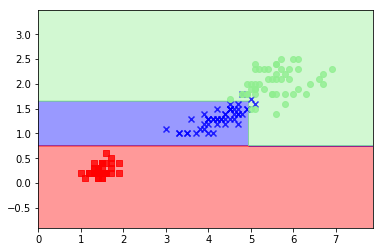

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,classifier=tree, test_idx=range(105,150))

## Classification Improvement: Random Forests

#### Theory of Random Forests

The classification of a single decision tree can be improved by using an _ensemble_ of decision trees. Random forests are such an ensemble, and are generated according to the following algorithm:

 - $for \space i=1...k$:
     - Randomly choose $n$ samples from the training set with replacement (i.e. a __bootstrap__ sample of size $n$)
     - Grow a decision tree from the bootstrap sample. At each node:
         - Randomly select $d$ features without replacement (typically $d=\sqrt{m}$)
         - Split the node using the feature that maximizes information gain. 
 - Aggregate the prediction by each tree to assign the class label by __majority vote__.
 
 
Random forests have the advantage of generating robust models with good generalization error, reduced overfitting, and a reduced need for pruning.


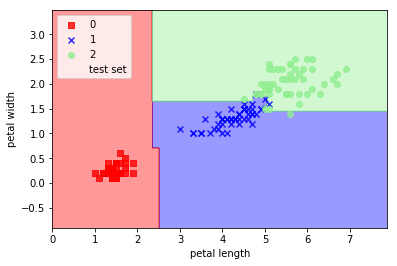

In [13]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=1,n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined,classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()